# Week 5: Pulling it all together and tailings mines
The **objective** of today's lecture is to demonstrate how to (1) pull data from a web service API; (2) convert the data into a geospatial dataframe; (3) collapse the data to calculate aggregate statistics; and (4) plot the data based on attributes of the dataset.

[Tailings mines](https://earthworks.org/issues/tailings) are a particular type of operation that stores the mining effluence in a big pond. Tailings are the waste materials left after the target mineral is extracted from ore. They consist of crushed rock, water, and trace minerals and chemicals like copper, mercury, sulfuric acid, and cyanide. There has been an [worrisome number of tailings dams failures](https://www.wise-uranium.org/mdaf.html) over the past few decades.  

Can we better understand the problem using the basic operations we've learned in the past?  How do we determine the value of the data - how clean or standardized is the dataset? 

Interestingly, most of the data on tailings dams has been assembled by the [Church of England](https://www.churchofengland.org/about/leadership-and-governance/church-england-pensions-board/pensions-board-investments/investor
). We can read in the data directly from their website, and explore their APIs.

In [1]:
import pandas
import geopandas

df = pandas.read_json("https://tailing.grida.no/api/tailings_all?format=json")
gdf = geopandas.GeoDataFrame(
    df, 
    geometry=geopandas.points_from_xy(df["longitude"], df["latitude"])
)

In [2]:
for c in gdf.columns:
  print(c)

ubc_number
owner_company
partners
operator
mine
tsf
country
latitude
longitude
status
construction_year
raise_type
current_maximum_height
current_tailings_storage
planned_storage_5_years
hazard_categorization
classification_system
history_stability_concerns
downstream_impact
extreme_weather_secure
currently_approved_design
visible
duplicate
link
notes
recent_independent_expert_review
relevant_engineering_records
internal_external_eng_support
closure_plan_dam
closure_plan_long_term_monitoring
disclosure_origin
cell_info
geometry


In [3]:
# this is a messy dataset
gdf[["hazard_categorization", "classification_system"]]

,hazard_categorization,classification_system
0,"High, High C",ANCOLD 2012
1,High,CDA 2007 (2013)
2,High,CDA 2007 (2013)
3,Low,CDA 2007 (2013)
4,Low,CDA 2007 (2013)
...,...,...
2050,Insignificant,Anglo American Technical Standard (AA TS 602 001)
2051,25,technical operating risk assessment system (TO...
2052,low risk,SANS 10286
2053,Medium risk,SANS 10286


In [4]:
gdf[
    (gdf.status=="Active") & 
    (gdf.history_stability_concerns == "Yes")
].shape

(96, 33)

Text(0.5, 1.0, 'Global Tailings Mines')

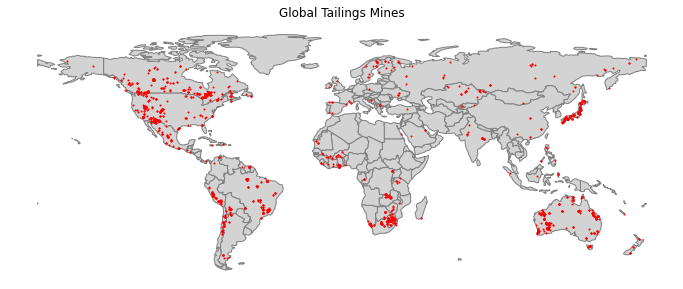

In [5]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,8))

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world = world[world["name"] != "Antarctica"]

world.plot(
    ax=ax,
    color="lightgrey",
    edgecolor="grey"
)

gdf.plot(
    ax=ax, 
    color="red",
    markersize=1
)

# optional to turn off all boxes and axis labels
plt.box(on=None)
plt.xticks([])
plt.yticks([])
plt.title("Global Tailings Mines")

Text(0.5, 1.0, 'Active and high-concern tailings mines.')

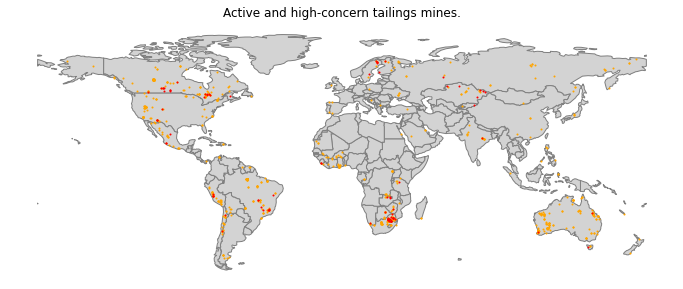

In [6]:
fig, ax = plt.subplots(figsize=(12,8))

world.plot(
    ax=ax,
    color="lightgrey",
    edgecolor="grey"
)

gdf[(gdf.status=="Active") & (gdf.history_stability_concerns != "Yes")].plot(
    ax=ax, 
    color="orange",
    markersize=1
)

gdf[(gdf.status=="Active") & (gdf.history_stability_concerns == "Yes")].plot(
    ax=ax, 
    color="red",
    markersize=1
)

# optional to turn off all boxes and axis labels
plt.box(on=None)
plt.xticks([])
plt.yticks([])
plt.title("Active and high-concern tailings mines.")

In [7]:
len(set(gdf["country"]))

64

In [8]:
gdf.groupby(["country", "status"])["geometry"].count().reset_index()

,country,status,geometry
0,Argentina,Active,8
1,Argentina,Closed,3
2,Argentina,Inactive,4
3,Argentina,Inactive Care and Maintenance,1
4,Australia,Active,146
...,...,...,...
167,Zambia,Active,3
168,Zambia,Closed,2
169,Zambia,Active,3
170,Zambia,Closed,1
